In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("health_indicators_fall_detection.csv")
df.head()

Unnamed: 0  weight  weekly_supportive_care_hours  \
0           0   150.0                           0.0   
1           1   140.0                           0.0   
2           2   110.0                           0.0   
3           3   110.0                           0.0   
4           4   190.0                           0.0   

   weekly_respite_care_hours  weekly_rehabilitation_hours  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   

   weekly_palliative_hours  weekly_home_support_hours  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   

   weekly_attendant_care_hours  weekly_acute_hours  wci_quant_assess_num  ...  \
0                          0.0                 0.0                   NaN  ...   
1                          0.0                 0.0                   NaN  ...   
2                          0.0                 0.0                   NaN  ...   
3                          0.0                 0.0                   NaN  ...   
4                          0.0                 0.0                   NaN  ...   

   CoVID 19  Death Health Decline Health Status Check Hospitalization  \
0      True  False          False               False            True   
1      True  False          False               False           False   
2      True  False          False               False           False   
3     False  False          False               False           False   
4      True  False          False               False           False   

   Injury/Fall  LOC Change  Other Potential LOC Change (Health)  \
0        False       False  False                          True   
1        False       False   True                          True   
2        False       False  False                          True   
3        False       False  False                          True   
4        False       False  False                          True   

  Potential LOC Change (Non-Health)  
0                             False  
1                             False  
2                             False  
3                             False  
4                             False  

[5 rows x 150 columns]

## Data Preprocessing

In order to run the K means algorithm, the input data must satify the following requirements.
- All features must have numerical values only. Since K means algorithm works on distance calculation.
- Minimum outliers and noise
- Rescaling, since features with different scales can distort distance measurement
- Dataset is not skewed.
- Low Correality between variables

In [3]:
df = df.iloc[:,1:]
df.rename(columns={"has_mental_alzhemier's":'has_mental_alzhemiers'}, inplace=True)
df.head()
df.columns.tolist()

['weight',
 'weekly_supportive_care_hours',
 'weekly_respite_care_hours',
 'weekly_rehabilitation_hours',
 'weekly_palliative_hours',
 'weekly_home_support_hours',
 'weekly_attendant_care_hours',
 'weekly_acute_hours',
 'wci_quant_assess_num',
 'wci_qual_assess_num',
 'wci_not_eligible',
 'wci_location_of_Kit',
 'wci_kit_in_home',
 'wci_inactive_client_date',
 'wci_eligible_client',
 'wci_control_client',
 'wci_consent_given',
 'wci_client_status',
 'wci_active_client_date',
 'wci_3g_coverage',
 'unique_caregivers',
 'total_weekly_hours',
 'too_many_caregivers_client',
 'sub_area',
 'status',
 'special_meal_preparation',
 'special_equipment_details',
 'special_equipment',
 'shaving_electric_only',
 'sex',
 'service_start_date',
 'service_end_date',
 'reschedule_visit_time_protocol',
 'reschedule_details',
 'reschedule_caregiver_protocol',
 'requisition_rec_d',
 'refused_ppp',
 'previous_former_suspended_reason',
 'previous_former_date',
 'pets_details',
 'palliative',
 'number_of_unpai

Removing columns that involve dates, date of birth, Potential change in LOC since they do not provide good repeatability.

In [4]:
columns = ['weekly_home_support_hours','weekly_attendant_care_hours','weekly_acute_hours','wci_quant_assess_num','wci_qual_assess_num','wci_not_eligible','wci_location_of_Kit','wci_kit_in_home','wci_eligible_client','wci_control_client','wci_consent_given','wci_client_status','wci_3g_coverage','unique_caregivers','total_weekly_hours','too_many_caregivers_client','sub_area','status','special_meal_preparation','special_equipment_details','special_equipment','shaving_electric_only','sex','reschedule_visit_time_protocol','reschedule_details','reschedule_caregiver_protocol','requisition_rec_d','refused_ppp','previous_former_suspended_reason','pets_details','palliative','number_of_unpaid_invoices','number_of_other_orders','number_of_hs_orders','non_personal_care_plan_notes','non_client_phone_allowed','mental_health_details','medication_reminders','meal_preparation_regular','match_update_required','lives_with','light_housekeeping','laundry','language_preference','invoice_at_month_end_only','holiday_coverage','height','health_physical_issues_details','has_delegated_function','grooming','gender_other','gender','fsa','former_reason','errands','dressing','denture_care','delegated_functions','condition_of_client_s_house','compression_stockings','client_type','client_smoker','client_not_setup','client_demeanour','client_contract_rec_d','client_ar','client_amount_owing','catheter_care','caregiver_smoker_preference','caregive_gender_preference','cancellation_protocol','blue_cross','bathing','avg_weekly_hours','auto_approve_short_shifts','assist_with_toileting','assist_with_mobility','area','allergies_sensitivities','age','has_mental_dementia','has_mental_alzhemiers','has_mental_depression','has_mental_short-term_memory_impairment','has_mental_loss_of_orientation','has_mental_anxiety','has_mental_bi-polar','has_mental_other','mental_count','has_physical_diabetes','has_physical_stroke','has_physical_high_blood_pressure','has_physical_cancer','has_physical_copd','has_physical_arthritis','has_physical_high_cholesterol','has_physical_mobility_issues','has_physical_vision_impairment','has_physical_hearing_impairment','has_physical_chronic_pain','has_physical_gastro-intestinal_issue','has_physical_heart_failure','has_physical_other','physical_count','has_mobility_cane','has_mobility_walker','has_mobility_wheelchair','has_mobility_tub','has_mobility_toilet','has_mobility_commode','has_mobility_catheter','has_mobility_grab_bar','has_mobility_scooter','has_mobility_rollator','has_mobility_crutches','has_mobility_bed_railing','has_mobility_shower_chair','has_mobility_hospital_bed','has_mobility_lifeline','mobility_count','is_smoker','has_pets','house_condition','Account Status Change','Care Plan/Schedule Update','Client Issue/Incident/Complaint','CoVID 19','Health Decline','Health Status Check','Hospitalization','Injury/Fall','LOC Change','Other']
df = df[columns]

### Correlation analysis

<AxesSubplot:title={'center':'Correlation between variables where absolute value> 0.50'}>

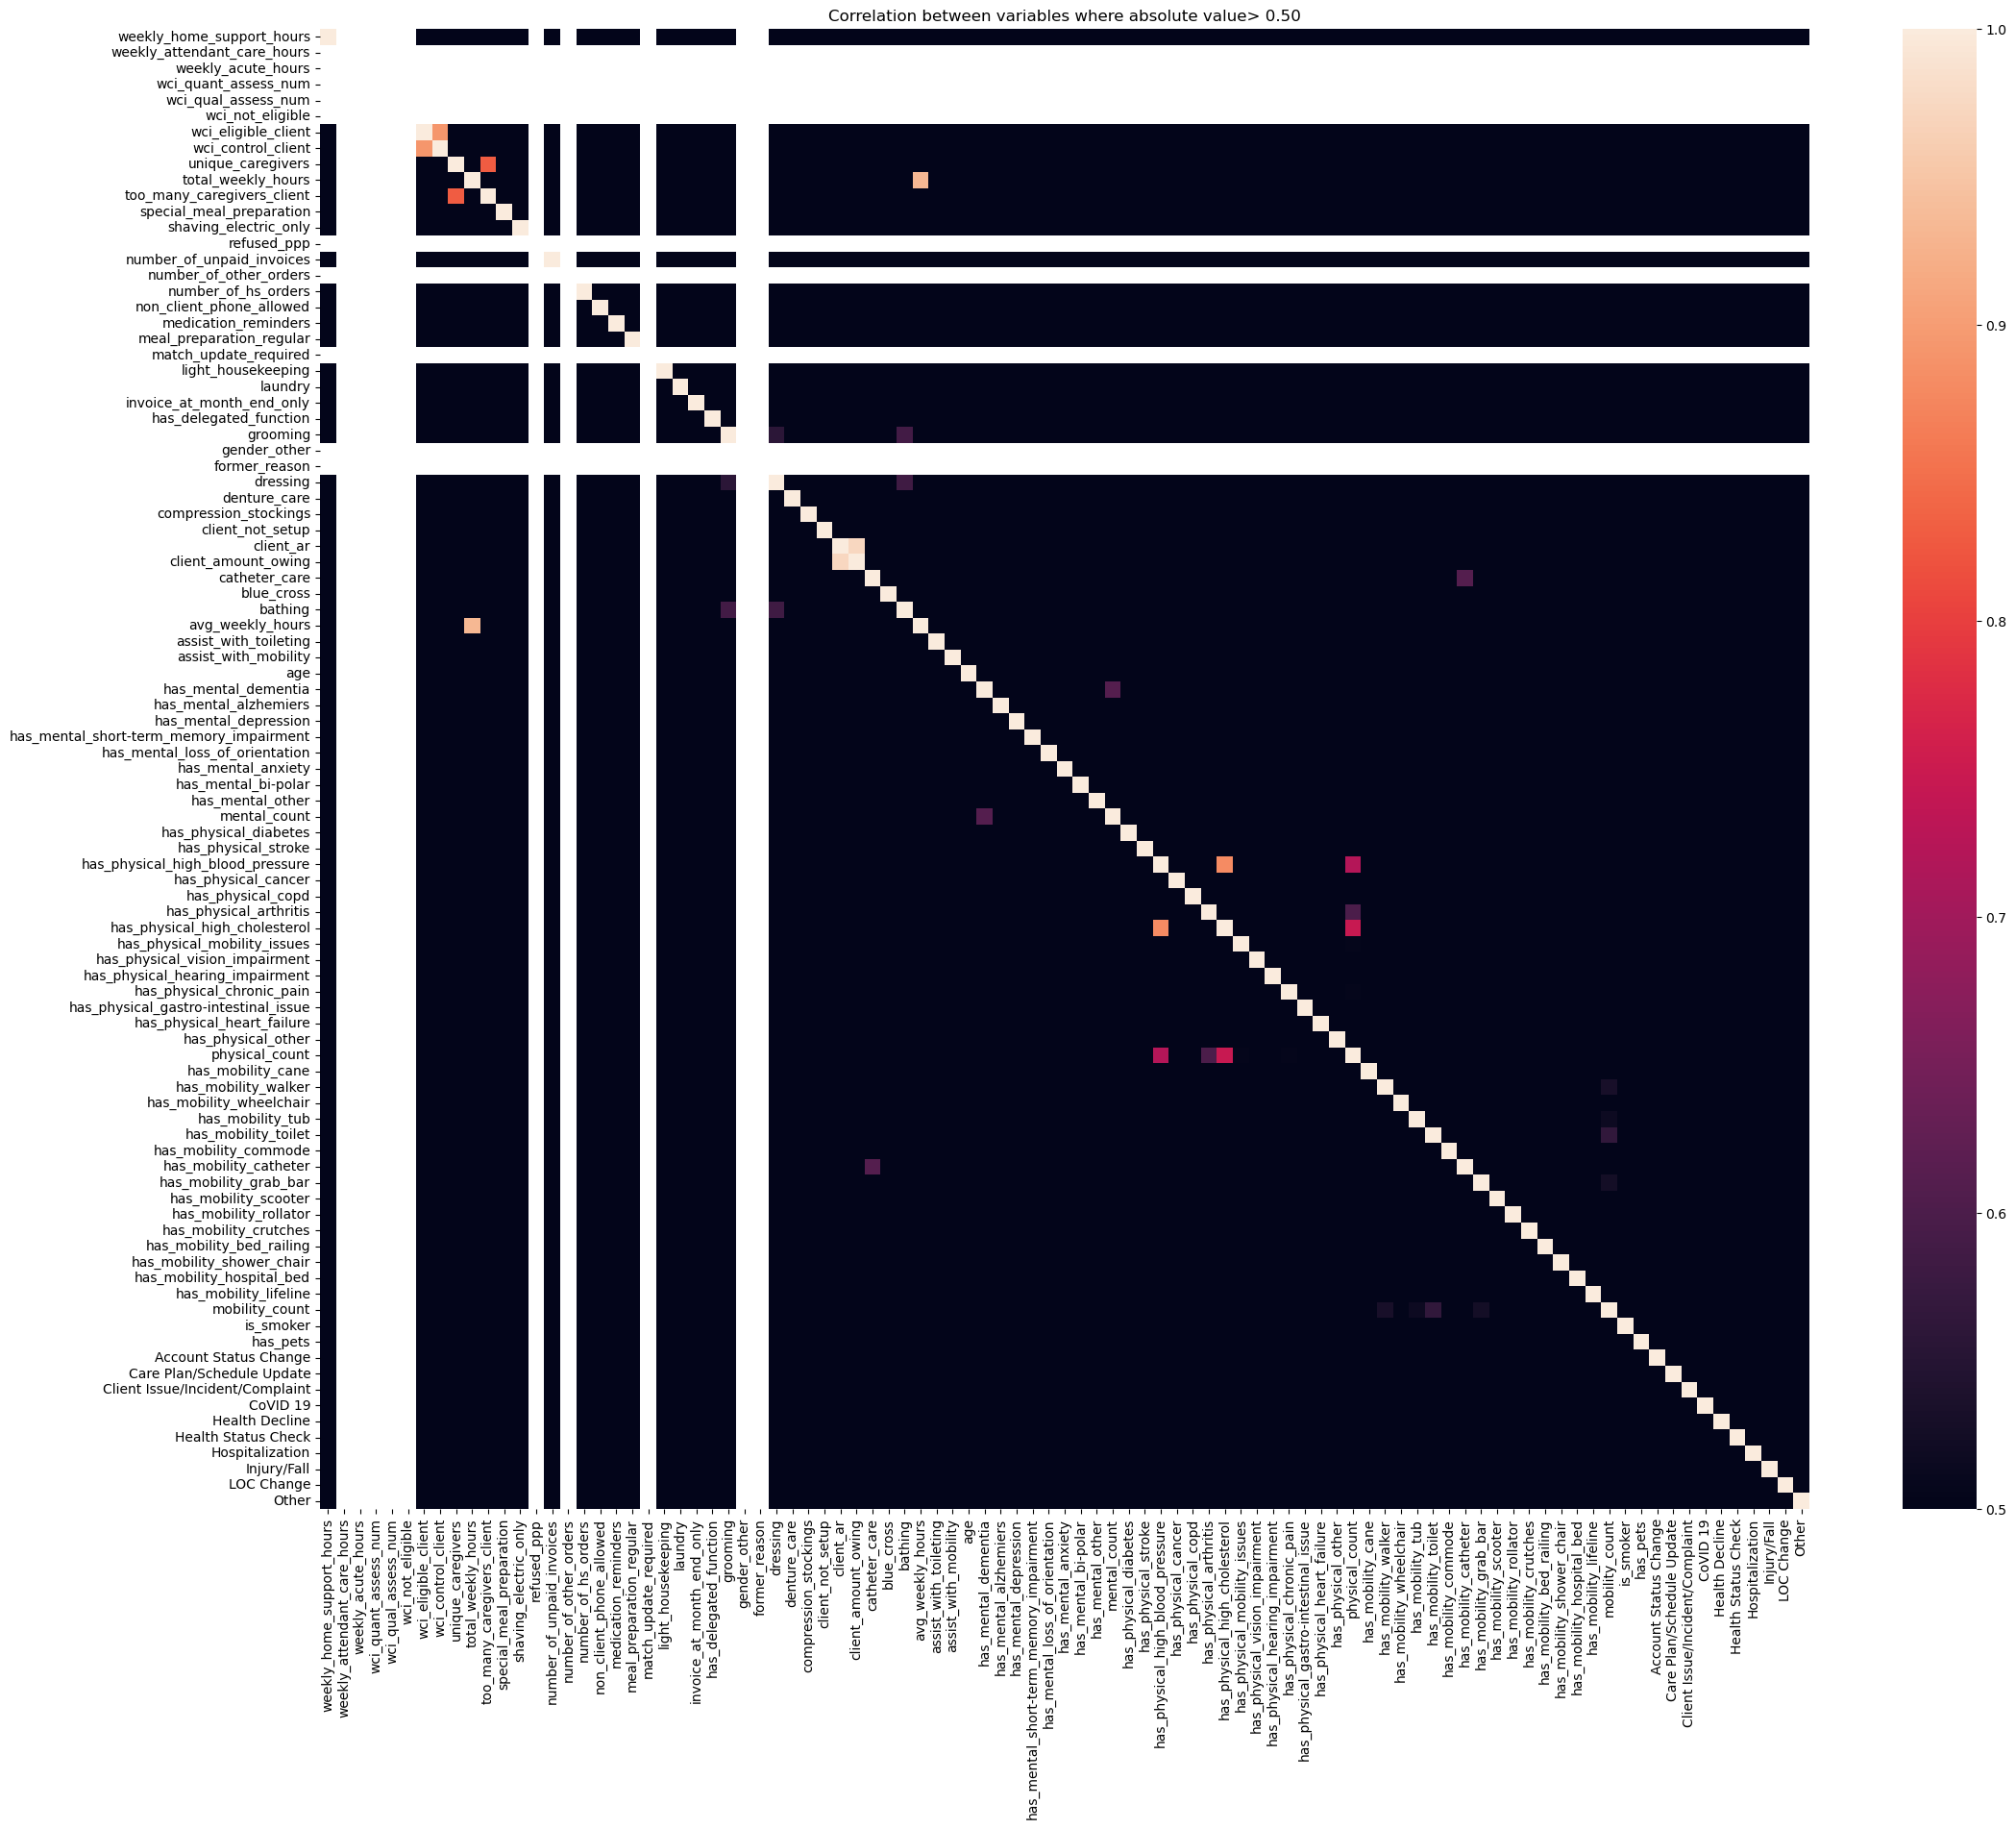

In [98]:
corr = df.corr().abs()
plt.figure(figsize=(25,20))
plt.title("Correlation between variables where absolute value> 0.50")
plt.xlabel("Features")
sns.heatmap(corr, vmin=0.5, annot=False)


In [6]:
a = corr.to_numpy()
x = np.where(a >= 0.90)
colindex = list(zip(*x))
to_drop = [(corr.columns[i], corr.columns[j]) for i, j in colindex if i != j]
to_drop

[('total_weekly_hours', 'avg_weekly_hours'),
 ('client_ar', 'client_amount_owing'),
 ('client_amount_owing', 'client_ar'),
 ('avg_weekly_hours', 'total_weekly_hours')]

In [7]:
corr.loc[['total_weekly_hours', 'client_ar'],['avg_weekly_hours','client_amount_owing']]

avg_weekly_hours  client_amount_owing
total_weekly_hours          0.932649             0.176274
client_ar                   0.083924             0.973758

In [8]:
to_drop = [j for i,j in to_drop[:len(to_drop)//2]]

In [9]:
df_1 = df.drop(to_drop, axis=1)
df_1.head()

weekly_home_support_hours  weekly_attendant_care_hours  weekly_acute_hours  \
0                        0.0                          0.0                 0.0   
1                        0.0                          0.0                 0.0   
2                        0.0                          0.0                 0.0   
3                        0.0                          0.0                 0.0   
4                        0.0                          0.0                 0.0   

   wci_quant_assess_num  wci_qual_assess_num  wci_not_eligible  \
0                   NaN                  NaN             False   
1                   NaN                  NaN             False   
2                   NaN                  NaN             False   
3                   NaN                  NaN             False   
4                   NaN                  NaN             False   

                                 wci_location_of_Kit wci_kit_in_home  \
0                                                NaN             NaN   
1                                                NaN             NaN   
2                                                NaN             NaN   
3                                                NaN             NaN   
4  Downstairs on the table next to the spare wash...             Yes   

   wci_eligible_client  wci_control_client  ... Account Status Change  \
0                False                True  ...                  True   
1                False                True  ...                 False   
2                False                True  ...                 False   
3                False                True  ...                 False   
4                 True               False  ...                  True   

  Care Plan/Schedule Update Client Issue/Incident/Complaint  CoVID 19  \
0                     False                           False      True   
1                      True                            True      True   
2                      True                            True      True   
3                      True                            True     False   
4                      True                           False      True   

   Health Decline  Health Status Check Hospitalization Injury/Fall  \
0           False                False            True       False   
1           False                False           False       False   
2           False                False           False       False   
3           False                False           False       False   
4           False                False           False       False   

   LOC Change  Other  
0       False  False  
1       False   True  
2       False  False  
3       False  False  
4       False  False  

[5 rows x 131 columns]

### Missing Values

In [10]:
nullVals = pd.Series(df_1.isnull().sum())
nullVals[nullVals > 210]

wci_quant_assess_num                419
wci_qual_assess_num                 419
wci_location_of_Kit                 283
wci_kit_in_home                     283
wci_client_status                   267
wci_3g_coverage                     232
previous_former_suspended_reason    219
pets_details                        271
palliative                          394
non_personal_care_plan_notes        272
mental_health_details               287
gender_other                        419
former_reason                       419
delegated_functions                 373
auto_approve_short_shifts           222
allergies_sensitivities             367
dtype: int64

In [11]:
df_1.drop(["wci_quant_assess_num", "wci_qual_assess_num", "former_reason", "gender_other", "wci_location_of_Kit", "wci_3g_coverage", "wci_kit_in_home", "non_personal_care_plan_notes", "auto_approve_short_shifts"], axis=1, inplace=True)

In [12]:
nullVals = pd.Series(df_1.isnull().sum())
nullVals[nullVals > 0].index.tolist()

['wci_consent_given',
 'wci_client_status',
 'special_equipment_details',
 'special_equipment',
 'sex',
 'reschedule_visit_time_protocol',
 'reschedule_details',
 'reschedule_caregiver_protocol',
 'requisition_rec_d',
 'previous_former_suspended_reason',
 'pets_details',
 'palliative',
 'mental_health_details',
 'lives_with',
 'language_preference',
 'holiday_coverage',
 'height',
 'health_physical_issues_details',
 'gender',
 'errands',
 'delegated_functions',
 'condition_of_client_s_house',
 'client_smoker',
 'client_demeanour',
 'client_contract_rec_d',
 'caregiver_smoker_preference',
 'caregive_gender_preference',
 'cancellation_protocol',
 'allergies_sensitivities',
 'has_mental_dementia',
 'has_mental_alzhemiers',
 'has_mental_depression',
 'has_mental_short-term_memory_impairment',
 'has_mental_loss_of_orientation',
 'has_mental_anxiety',
 'has_mental_bi-polar',
 'has_mental_other',
 'has_physical_diabetes',
 'has_physical_stroke',
 'has_physical_high_blood_pressure',
 'has_phys

In [13]:
df_1[['has_mental_dementia',
 'has_mental_alzhemiers',
 'has_mental_depression',
 'has_mental_short-term_memory_impairment',
 'has_mental_loss_of_orientation',
 'has_mental_anxiety',
 'has_mental_bi-polar',
 'has_mental_other',
 'has_physical_diabetes',
 'has_physical_stroke',
 'has_physical_high_blood_pressure',
 'has_physical_cancer',
 'has_physical_copd',
 'has_physical_arthritis',
 'has_physical_high_cholesterol',
 'has_physical_mobility_issues',
 'has_physical_vision_impairment',
 'has_physical_hearing_impairment',
 'has_physical_chronic_pain',
 'has_physical_gastro-intestinal_issue',
 'has_physical_heart_failure',
 'has_physical_other',
 'has_mobility_cane',
 'has_mobility_walker',
 'has_mobility_wheelchair',
 'has_mobility_tub',
 'has_mobility_toilet',
 'has_mobility_commode',
 'has_mobility_catheter',
 'has_mobility_grab_bar',
 'has_mobility_scooter',
 'has_mobility_rollator',
 'has_mobility_crutches',
 'has_mobility_bed_railing',
 'has_mobility_shower_chair',
 'has_mobility_hospital_bed',
 'has_mobility_lifeline']]

has_mental_dementia  has_mental_alzhemiers  has_mental_depression  \
0                    0.0                    0.0                    0.0   
1                    NaN                    NaN                    NaN   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    1.0                    0.0                    0.0   
..                   ...                    ...                    ...   
414                  NaN                    NaN                    NaN   
415                  0.0                    0.0                    0.0   
416                  0.0                    0.0                    0.0   
417                  0.0                    0.0                    0.0   
418                  1.0                    0.0                    0.0   

     has_mental_short-term_memory_impairment  has_mental_loss_of_orientation  \
0                                        0.0                             0.0   
1                                        NaN                             NaN   
2                                        0.0                             0.0   
3                                        0.0                             0.0   
4                                        0.0                             0.0   
..                                       ...                             ...   
414                                      NaN                             NaN   
415                                      0.0                             0.0   
416                                      0.0                             0.0   
417                                      0.0                             0.0   
418                                      0.0                             0.0   

     has_mental_anxiety  has_mental_bi-polar  has_mental_other  \
0                   0.0                  0.0               0.0   
1                   NaN                  NaN               NaN   
2                   0.0                  0.0               0.0   
3                   0.0                  0.0               0.0   
4                   0.0                  0.0               0.0   
..                  ...                  ...               ...   
414                 NaN                  NaN               NaN   
415                 0.0                  0.0               0.0   
416                 0.0                  0.0               0.0   
417                 0.0                  0.0               0.0   
418                 0.0                  0.0               0.0   

     has_physical_diabetes  has_physical_stroke  ...  has_mobility_commode  \
0                      0.0                  0.0  ...                   0.0   
1                      1.0                  0.0  ...                   1.0   
2                      0.0                  0.0  ...                   0.0   
3                      0.0                  0.0  ...                   0.0   
4                      0.0                  0.0  ...                   0.0   
..                     ...                  ...  ...                   ...   
414                    1.0                  0.0  ...                   0.0   
415                    0.0                  0.0  ...                   0.0   
416                    1.0                  0.0  ...                   0.0   
417                    0.0                  0.0  ...                   0.0   
418                    0.0                  0.0  ...                   0.0   

     has_mobility_catheter  has_mobility_grab_bar  has_mobility_scooter  \
0                      0.0                    0.0                   0.0   
1                      0.0                    0.0                   0.0   
2                      0.0                    0.0                   0.0   
3                      0.0                    0.0                   0.0   
4                      0.0                    0.0 

In [14]:
df_1.fillna({'has_mental_dementia' : 0,
 'has_mental_alzhemiers' : 0,
 'has_mental_depression' : 0,
 'has_mental_short-term_memory_impairment' : 0,
 'has_mental_loss_of_orientation' : 0,
 'has_mental_anxiety' : 0,
 'has_mental_bi-polar' : 0,
 'has_mental_other' : 0,
 'has_physical_diabetes' : 0,
 'has_physical_stroke' : 0,
 'has_physical_high_blood_pressure' : 0,
 'has_physical_cancer' : 0,
 'has_physical_copd' : 0,
 'has_physical_arthritis' : 0,
 'has_physical_high_cholesterol' : 0,
 'has_physical_mobility_issues' : 0,
 'has_physical_vision_impairment' : 0,
 'has_physical_hearing_impairment' : 0,
 'has_physical_chronic_pain' : 0,
 'has_physical_gastro-intestinal_issue' : 0,
 'has_physical_heart_failure' : 0,
 'has_physical_other' : 0,
 'has_mobility_cane' : 0,
 'has_mobility_walker' : 0,
 'has_mobility_wheelchair' : 0,
 'has_mobility_tub' : 0,
 'has_mobility_toilet' : 0,
 'has_mobility_commode' : 0,
 'has_mobility_catheter' : 0,
 'has_mobility_grab_bar' : 0,
 'has_mobility_scooter' : 0,
 'has_mobility_rollator' : 0,
 'has_mobility_crutches' : 0,
 'has_mobility_bed_railing' : 0,
 'has_mobility_shower_chair' : 0,
 'has_mobility_hospital_bed' : 0,
 'has_mobility_lifeline' : 0}, inplace=True)

In [15]:
df_1['wci_consent_given'].value_counts()

Signed      152
Pending      39
Declined     33
Name: wci_consent_given, dtype: int64

In [16]:
df_1['wci_consent_given'].fillna('Signed', inplace=True)

In [17]:
df_1['wci_client_status'].value_counts()

Active    152
Name: wci_client_status, dtype: int64

In [18]:
df_1['wci_client_status'].fillna('Inactive', inplace=True)

In [19]:
df_1['special_equipment_details'].value_counts()

none                                                                                                    23
walker                                                                                                  22
See above                                                                                               16
Cane                                                                                                    10
Walker                                                                                                   6
                                                                                                        ..
also has hospital bed                                                                                    1
UPDAT MAY 22/19- Wheel Chair,tub chair,raised toilet seat,life line transfer board, sara steady lift     1
cane and walker- UPDATED MAY 15/19- hearing aids, tub chair, commode, grab bars, life line               1
UPDATED MAY 16/19- rollator, canes, c

In [20]:
df_1.drop('special_equipment_details', axis=1, inplace=True)

In [21]:
df_1['special_equipment'].value_counts()

4 wheel walker                                                                      78
Cane                                                                                21
2 wheel walker                                                                      13
Grab bars                                                                           12
4 wheel walker;Cane                                                                  8
                                                                                    ..
Raised toilet seat;Other                                                             1
Cane;Grab bars;Handheld shower head;Lifeline                                         1
4 wheel walker;Grab bars;Handheld shower head;Lifeline;Blister Pack;Hospital Bed     1
4 wheel walker;Handheld shower head;Lifeline;Shower chair                            1
Cane;CPAP                                                                            1
Name: special_equipment, Length: 156, dtype

In [22]:
df_1['special_equipment'].fillna('Other', inplace=True)

In [23]:
df_1['sex'].value_counts()

Female    301
Male      111
Name: sex, dtype: int64

In [24]:
df_1['sex'].fillna('Female', inplace=True)

In [25]:
df_1['reschedule_visit_time_protocol'].value_counts()

Visit time flexible within the day     219
Visit time flexible within the week    105
Visit time rigid                        92
Name: reschedule_visit_time_protocol, dtype: int64

In [26]:
df_1['reschedule_visit_time_protocol'].fillna('Visit time flexible within the day', inplace=True)

In [27]:
df_1['reschedule_details'].unique()

array(['Call daughter Megan',
       'Call Charlotte directly to discuss the options',
       'flexible to a point but has to cover breakfast and lunch',
       'Call the client directly to discuss the options',
       'call Shirley directly', 'Flexible in afternoons - no mornings',
       'Client will take new Caregiver',
       'Flexible within day and week. Check with client before booking new CG, as well as advise daughter Cathy',
       'May take new caregiver, call first to confirm. Not flexible with time.',
       'Try to get the shifts close to original time if possible. Does not deal well with change so be sure to call daughter Lynn to make changes',
       'Could be flexible if need be but care is mostly respite for Alice so she would have to know',
       'Call client to discuss time change or CG change - may cancel as she schedules outings around visits',
       'please call Shirley',
       'Please ensure to only send trained staff in with client. can send new staff in for

In [28]:
df_1['reschedule_details'].fillna('Other', inplace=True)

In [29]:
df_1['reschedule_caregiver_protocol'].value_counts()

May take new CG                 347
Familiar faces only              53
Originally scheduled CG only     16
Name: reschedule_caregiver_protocol, dtype: int64

In [30]:
df_1['reschedule_caregiver_protocol'].fillna('May take new CG', inplace=True)

In [31]:
df_1['requisition_rec_d'].value_counts()

2018-07-01    26
2021-11-30     4
2020-12-02     3
2021-06-21     3
2021-12-17     3
              ..
2017-11-16     1
2016-11-28     1
2016-11-25     1
2016-11-18     1
2016-08-11     1
Name: requisition_rec_d, Length: 312, dtype: int64

In [32]:
df_1.drop('requisition_rec_d', axis=1, inplace=True)

In [33]:
df_1['previous_former_suspended_reason'].value_counts()

In Hospital                       67
Dealing with client issues        64
Admitted to Hospital              30
No Longer Wants Home Care         11
Temporary Service Completed        7
Case Closed                        7
Family Visiting                    5
Could Not Find Caregiver Match     2
Difficult client                   2
Case Transferred                   1
Non Payment                        1
Went Into a Nursing Home           1
Felt Co-pay was Too High           1
Respite                            1
Name: previous_former_suspended_reason, dtype: int64

In [34]:
df_1.drop('previous_former_suspended_reason', axis=1, inplace=True)

In [35]:
df_1['pets_details'].value_counts()

Cat(s)                     76
Dog(s)                     44
Cat(s);Dog(s)              12
Other                       7
None                        3
no                          1
Small dog                   1
n/a;Dog(s)                  1
No                          1
Cats                        1
Dog - medium - friendly     1
Name: pets_details, dtype: int64

In [36]:
# df_1['pets_details'] = [0 if x in ['None', 'No', 'no'] else 1 for x in df_1['pets_details']]
df_1.drop('pets_details', axis=1, inplace=True)

In [37]:
df_1['palliative'].value_counts()

no     21
yes     4
Name: palliative, dtype: int64

In [38]:
df_1['palliative'].fillna('no', inplace=True)

In [39]:
df_1['mental_health_details'].value_counts()

Dementia                                                                         50
Other                                                                            30
Short-Term Memory Impairment                                                     16
Depression                                                                       10
Alzhemier's                                                                       6
Bi-polar                                                                          5
Alzhemier's;Dementia                                                              4
Dementia;Other                                                                    2
Bi-polar;Other                                                                    1
Dementia;Short-Term Memory Impairment                                             1
Depression and anxiety                                                            1
Dementia;Depression                                                         

Dropping this column as it is summarized as one-hot encoded features.

In [40]:
df_1.drop('mental_health_details', axis=1, inplace=True)

In [41]:
df_1['lives_with'].value_counts()

Alone              245
Spouse/Partner      96
Daughter            31
Other               27
Son                 15
Parent/Guardian      3
Name: lives_with, dtype: int64

In [42]:
df_1['lives_with'] = [0 if x == 'Alone' else 1 for x in df_1['lives_with']]

In [43]:
df_1['language_preference'].value_counts()

English Only                   367
Bilingual (Prefers English)     28
Bilingual (Prefers French)      20
French Only                      2
Name: language_preference, dtype: int64

In [44]:
df_1['language_preference'].isnull().sum()

2

In [45]:
df_1['language_preference'].fillna('English Only', inplace=True)

In [46]:
df_1['holiday_coverage'].value_counts()

yes                310
no                  76
check each time     26
always               5
Name: holiday_coverage, dtype: int64

In [47]:
df_1['holiday_coverage'].fillna('yes', inplace=True)

In [48]:
df_1['height'].value_counts()

5'4"     75
5'6"     59
5'5"     49
5'7"     33
5'2"     33
5'3"     32
5'0"     27
5'8"     25
5'10"    14
5'1"     12
5'9"     12
4'11"    10
5'11"    10
6'0"      6
6'2"      3
4'9"      3
6'1"      3
4'6"      1
Name: height, dtype: int64

In [49]:
df_1['height'].unique()

array(['5\'7"', '5\'6"', '5\'4"', '5\'1"', '5\'9"', '4\'9"', '5\'5"',
       '5\'8"', '5\'2"', '5\'11"', '5\'3"', '5\'0"', '4\'11"', '6\'2"',
       nan, '5\'10"', '6\'1"', '6\'0"', '4\'6"'], dtype=object)

In [50]:
def ft_to_cm(a):
    try:
        a = a.strip('\"').split('\'')
        height = int(a[1]) + int(a[0])*12
        height = round(height *2.54, 1)
        return height
    except:
        return a

In [51]:
df_1['height'] = [ft_to_cm(x) for x in df_1['height']]

In [52]:
df_1['height'].fillna(df_1['height'].mean(), inplace=True)

In [53]:
df_1['health_physical_issues_details'].value_counts()

Other                                            48
Mobility Issues                                  29
Arthritis                                        25
Diabetes                                         21
Cancer                                           19
                                                 ..
Stroke, skin and kidney cancer                    1
Type II Diabetes, Angina, High Blood Pressure     1
Diabetes;Mobility Issues;Mobility Issues          1
Arthritis;Chronic Pain;Diabetes                   1
Asthma                                            1
Name: health_physical_issues_details, Length: 178, dtype: int64

In [54]:
df_1.drop('health_physical_issues_details', axis=1, inplace=True)

In [55]:
df_1['errands'].unique().tolist()

[nan,
 'Yes- client pays mileage',
 'yes',
 'may need CG to take to doctor appointments',
 'If Requested',
 'If Requested - Groceries',
 'not approved  - Guna does all those now',
 'Yes- as needed',
 'Family does all errands',
 'As Requested',
 'Appointments as requested',
 'Errands on Friday - Groceries and take back library books',
 'If requested',
 'CG does errands when needed-her family usually does them.',
 'groceries/banking',
 'Client likes to go out on Wednesdays to do her errands, staff can drive her',
 'Client and CG walk to local church to shop for free give outs.',
 'local errands only',
 'CG will do errands when clients needs some done',
 'CG gets groceries on Thursdays',
 'no- family does',
 'Yes - Approved',
 'Yes',
 'Only as needed- client drives',
 'Occasionally',
 'no - possible medical appts',
 'Groceries, medical appointments, etc.',
 "occasionally to medical apt's",
 'doctor apt, grocery shop',
 'husband does all errands',
 'Not approved',
 'maybe grocery shopping'

In [56]:
def get_casefold(a):
    try:
        return a.casefold()
    except:
        return a

In [57]:
df_1['errands'] = [0 if 'no' in get_casefold(a) else 1 for x in df_1['errands']]

C:\Users\athul\AppData\Local\Temp\ipykernel_11840\2076930693.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df_1['errands'] = [0 if 'no' in get_casefold(a) else 1 for x in df_1['errands']]


In [58]:
df_1['delegated_functions'].value_counts()

2021-09-24 [bhood] - Other: NA                                                                                                                                                                                                                                             3
2021-10-03 [dneil] - Other: N/A                                                                                                                                                                                                                                            3
2021-10-07 [bhood] - Other: NA                                                                                                                                                                                                                                             3
2021-10-04 [dneil] - Other: N/A                                                                                                                                                                  

In [59]:
df_1.drop('delegated_functions', axis=1, inplace=True)

In [60]:
df_1['condition_of_client_s_house'].value_counts()

tidy                                                                         16
good                                                                         16
clean and tidy                                                               16
Tidy                                                                         15
clean                                                                         8
                                                                             ..
UPDATE: May 14/19-House is very cluttery, but does have space for walking     1
Spotless and spacious                                                         1
small crowded apartment                                                       1
Older but neat and tidy                                                       1
Tidy house                                                                    1
Name: condition_of_client_s_house, Length: 284, dtype: int64

In [61]:
df_1.drop('condition_of_client_s_house', axis=1, inplace=True)

In [62]:
df_1.drop('client_smoker', axis=1, inplace=True)

In [63]:
df_1['client_demeanour'].value_counts()

Friendly                         38
friendly                         13
Kind                              9
very nice                         8
nice                              7
                                 ..
very kind, approachable, warm     1
Quiet, and reserved.              1
Rather strange                    1
Friendly and chatty               1
Very nice, talkative              1
Name: client_demeanour, Length: 269, dtype: int64

In [64]:
df_1.drop('client_demeanour', axis=1, inplace=True)

In [65]:
df_1['client_contract_rec_d'].value_counts()

2015-01-09    10
2021-12-09     4
2021-10-07     4
2021-03-31     3
2020-10-13     3
              ..
2017-01-26     1
2017-08-30     1
2017-02-09     1
2017-02-05     1
2016-08-19     1
Name: client_contract_rec_d, Length: 311, dtype: int64

In [66]:
df_1.drop('client_contract_rec_d', axis=1, inplace=True)

In [67]:
df_1.drop([ 'caregiver_smoker_preference',
 'caregive_gender_preference',
 'cancellation_protocol','allergies_sensitivities'], axis=1, inplace=True)

In [68]:
df_1['sex'].value_counts()

Female    308
Male      111
Name: sex, dtype: int64

In [69]:
df_1['sex'].fillna('ffill', inplace=True)

In [70]:
df_1['gender'].value_counts()

Identify as Woman    222
Identify as Man       75
Name: gender, dtype: int64

In [71]:
df_1['gender'].fillna('ffill', inplace=True)

In [72]:
df_1['is_smoker'].value_counts()

0.0    366
1.0     51
Name: is_smoker, dtype: int64

In [73]:
df_1['is_smoker'].fillna(0, inplace=True)

In [74]:
df_1['has_pets'].value_counts()

0.0    274
1.0    143
Name: has_pets, dtype: int64

In [75]:
df_1['has_pets'].fillna(0, inplace=True)

In [76]:
df_1['house_condition'].value_counts()

clean    308
dirty     45
Name: house_condition, dtype: int64

In [77]:
df_1['house_condition'].fillna('clean', inplace=True)

In [78]:
nullVals = pd.Series(df_1.isnull().sum())
nullVals[nullVals > 0].index.tolist()

[]

In [79]:
df_1.select_dtypes(include='O')

wci_consent_given wci_client_status  \
0              Signed          Inactive   
1            Declined          Inactive   
2              Signed          Inactive   
3              Signed          Inactive   
4              Signed            Active   
..                ...               ...   
414            Signed          Inactive   
415            Signed            Active   
416            Signed          Inactive   
417            Signed          Inactive   
418            Signed          Inactive   

                                       sub_area  status  \
0                          Downtown Fredericton  Active   
1                                     Woodstock  Active   
2                                     Brookside  Active   
3                     Bath and Surrounding Area  Active   
4                               Moncton - North  Active   
..                                          ...     ...   
414  Florenceville-Bristol and Surrounding Area  Active   
415                         St. Andrews-Bayside  Active   
416  Florenceville-Bristol and Surrounding Area  Active   
417                                   Lakeville  Active   
418                                      Noonan  Active   

                    special_equipment     sex  \
0                               Other    Male   
1               4 wheel walker;Oxygen  Female   
2                      4 wheel walker  Female   
3                               Other  Female   
4                 4 wheel walker;Lift  Female   
..                                ...     ...   
414  4 wheel walker;Cane;Shower chair  Female   
415                    4 wheel walker  Female   
416                    4 wheel walker  Female   
417                    4 wheel walker  Female   
418                             Other    Male   

          reschedule_visit_time_protocol  \
0                       Visit time rigid   
1                       Visit time rigid   
2     Visit time flexible within the day   
3     Visit time flexible within the day   
4     Visit time flexible within the day   
..                                   ...   
414  Visit time flexible within the week   
415                     Visit time rigid   
416   Visit time flexible within the day   
417                     Visit time rigid   
418   Visit time flexible within the day   

                                    reschedule_details  \
0                                  Call daughter Megan   
1       Call Charlotte directly to discuss the options   
2    flexible to a point but has to cover breakfast...   
3      Call the client directly to discuss the options   
4                                call Shirley directly   
..                                                 ...   
414  reschedule hours to a different day unless oth...   
415                                 Offer replacement.   
416                                    fairly flexible   
417               speak to client to advise of changes   
418  More of a remote area-harder to get CG-Client ...   

    reschedule_caregiver_protocol palliative language_preference  \
0                 May take new CG         no        English Only   
1                 May take new CG         no        English Only   
2                 May take new CG         no        English Only   
3             Familiar faces only         no        English Only   
4                 May take new CG         no        English Only   
..                            ...        ...                 ...   
414  Originally scheduled CG only         no        English Only   
415           Familiar faces only         no        English Only   
416               May take new CG         no        English Only   
417               May take new CG         no        English Only   
418               May take new CG         no        English Only   

    holiday_coverage             gender  fsa   client_type  \
0    check each time              ffill  E3B  Home Support   
1                yes  

In [80]:
df_1['sub_area'].value_counts()

Brookside                                     35
Woodstock                                     21
Downtown Fredericton                          16
Florenceville-Bristol and Surrounding Area    16
Fredericton North                             16
                                              ..
Salisbury                                      1
Marysville                                     1
Nashwaak Village/Durham Bridge                 1
Musquash                                       1
Grande - Digue                                 1
Name: sub_area, Length: 73, dtype: int64

Deleting this column assuming column 'fsa' can be an approximate replacement

In [81]:
df_1.drop('sub_area', axis=1, inplace=True)

In [82]:
df_1['reschedule_details'].value_counts()

Call client                                                                                                                               13
Other                                                                                                                                      5
Call client to reschedule                                                                                                                  3
speak to client                                                                                                                            2
Speak to son Ross Junior only as neither Ross or Mary Lou have the capacity to understand scheduling messages.                             2
                                                                                                                                          ..
will currently only take regular caregiver. Call and ask client because as her condition worsens, she may be willing to take a new cg.     1
Cant be morni

Column seems to have too many distinct values in order to provide any value to clustering.

In [83]:
df_1.drop('reschedule_details', axis=1, inplace=True)

In [84]:
df_1.select_dtypes(include='O').columns.unique()

Index(['wci_consent_given', 'wci_client_status', 'status', 'special_equipment',
       'sex', 'reschedule_visit_time_protocol',
       'reschedule_caregiver_protocol', 'palliative', 'language_preference',
       'holiday_coverage', 'gender', 'fsa', 'client_type', 'area',
       'house_condition'],
      dtype='object')

In [85]:
df_1[['wci_consent_given', 'wci_client_status', 'status', 'special_equipment',
       'sex', 'reschedule_visit_time_protocol',
       'reschedule_caregiver_protocol', 'palliative', 'language_preference',
       'holiday_coverage', 'gender', 'fsa', 'client_type', 'area',
       'house_condition']] = df_1[['wci_consent_given', 'wci_client_status', 'status', 'special_equipment',
       'sex', 'reschedule_visit_time_protocol',
       'reschedule_caregiver_protocol', 'palliative', 'language_preference',
       'holiday_coverage', 'gender', 'fsa', 'client_type', 'area',
       'house_condition']].apply(lambda x: pd.factorize(x)[0])


In [86]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Columns: 105 entries, weekly_home_support_hours to Other
dtypes: bool(35), float64(48), int64(22)
memory usage: 243.6 KB


<AxesSubplot:title={'center':'Absolute Correlation between variables'}>

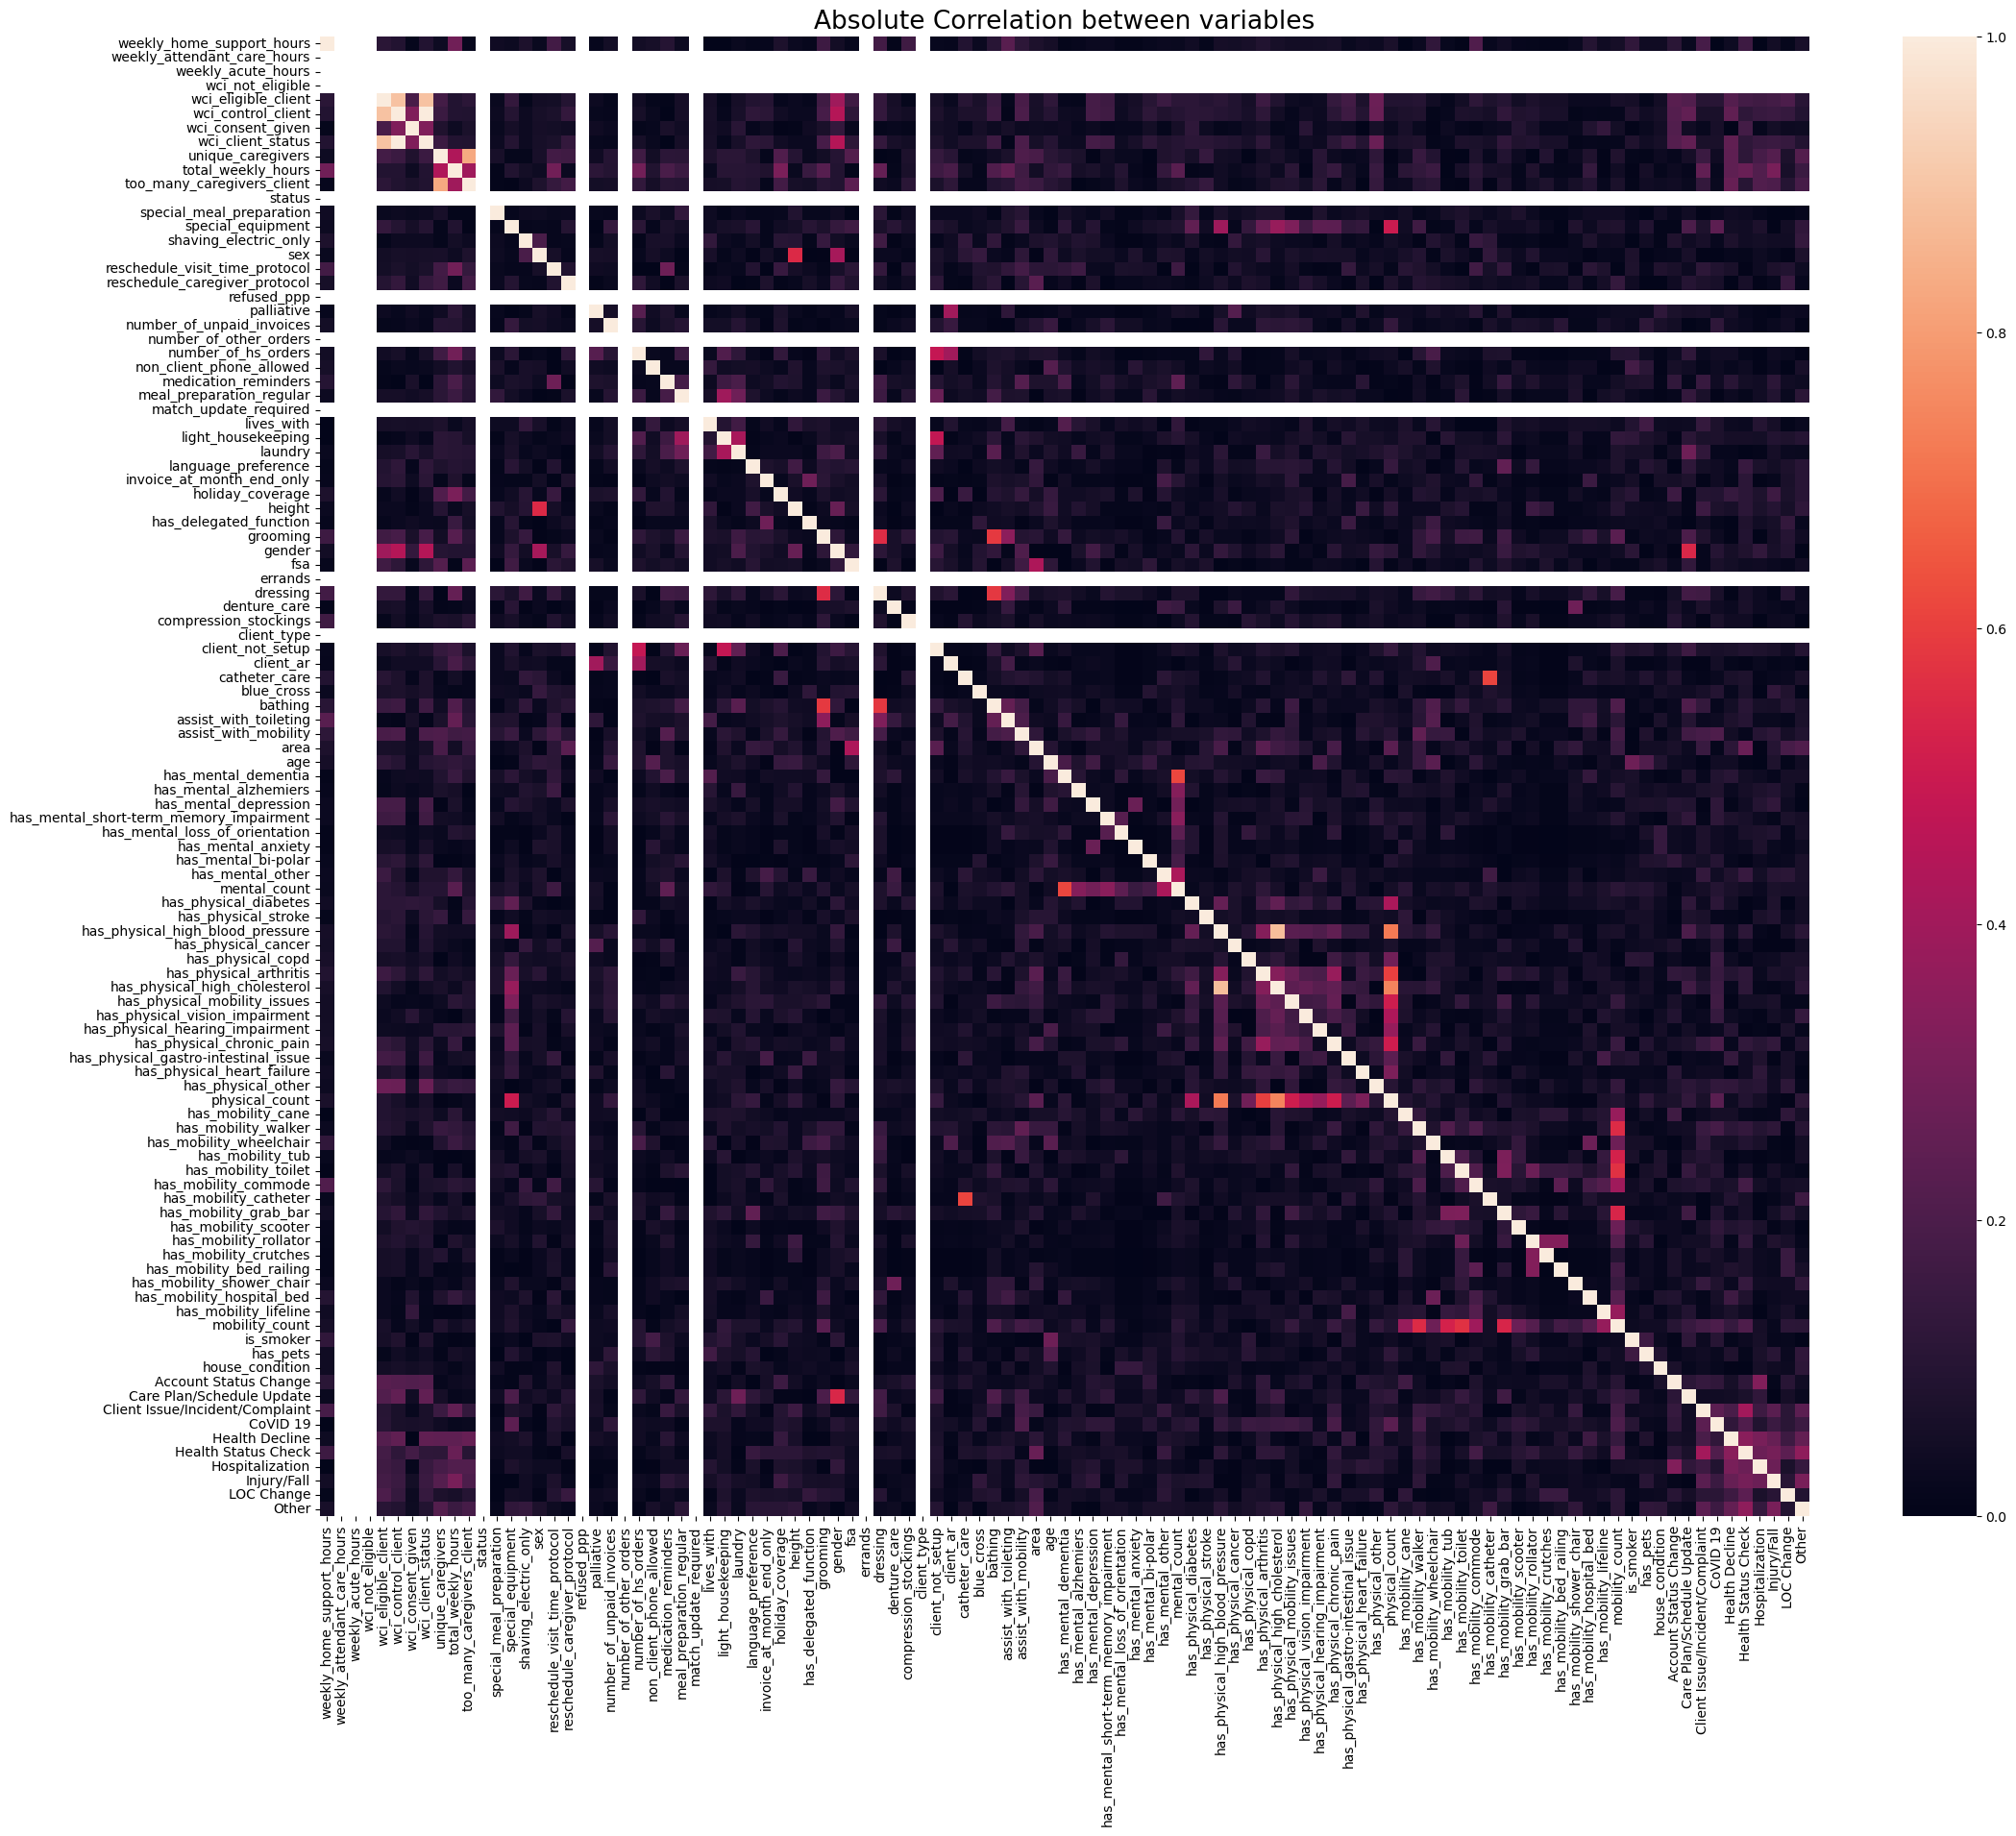

In [105]:
corr = df_1.corr().abs()
plt.figure(figsize=(25,20))
plt.title("Absolute Correlation between variables", fontsize=19)
plt.xlabel("Features")
sns.heatmap(corr, annot=False)

In [93]:
a = corr.to_numpy()
x = np.where(a >= 0.90)
colindex = list(zip(*x))
to_drop = [(corr.columns[i], corr.columns[j]) for i, j in colindex if i != j]
to_drop

[('wci_control_client', 'wci_client_status'),
 ('wci_client_status', 'wci_control_client')]

### Data Scaling

Using a MinMax scaler so that all values including outliers.

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_1[df_1.columns] = scaler.fit_transform(df_1[df_1.columns])
df_1.head()

weekly_home_support_hours  weekly_attendant_care_hours  weekly_acute_hours  \
0                        0.0                          0.0                 0.0   
1                        0.0                          0.0                 0.0   
2                        0.0                          0.0                 0.0   
3                        0.0                          0.0                 0.0   
4                        0.0                          0.0                 0.0   

   wci_not_eligible  wci_eligible_client  wci_control_client  \
0               0.0                  0.0                 1.0   
1               0.0                  0.0                 1.0   
2               0.0                  0.0                 1.0   
3               0.0                  0.0                 1.0   
4               0.0                  1.0                 0.0   

   wci_consent_given  wci_client_status  unique_caregivers  \
0                0.0                0.0           0.294118   
1                0.5                0.0           0.117647   
2                0.0                0.0           0.058824   
3                0.0                0.0           0.058824   
4                0.0                1.0           0.235294   

   total_weekly_hours  ...  Account Status Change  Care Plan/Schedule Update  \
0            0.193878  ...                    1.0                        0.0   
1            0.122449  ...                    0.0                        1.0   
2            0.397959  ...                    0.0                        1.0   
3            0.091837  ...                    0.0                        1.0   
4            0.142857  ...                    1.0                        1.0   

   Client Issue/Incident/Complaint  CoVID 19  Health Decline  \
0                              0.0       1.0             0.0   
1                              1.0       1.0             0.0   
2                              1.0       1.0             0.0   
3                              1.0       0.0             0.0   
4                              0.0       1.0             0.0   

   Health Status Check  Hospitalization  Injury/Fall  LOC Change  Other  
0                  0.0              1.0          0.0         0.0    0.0  
1                  0.0              0.0          0.0         0.0    1.0  
2                  0.0              0.0          0.0         0.0    0.0  
3                  0.0              0.0          0.0         0.0    0.0  
4                  0.0              0.0          0.0         0.0    0.0  

[5 rows x 105 columns]

## K Means Clustering

In [109]:
from sklearn.cluster import KMeans

kmeans_10 = KMeans(init='random',
               n_clusters=2,
               n_init=10)

kmeans_10.fit(df_1)

clusters_10 = kmeans_10.predict(df_1)

In [110]:
df_clustered = pd.DataFrame(df_1, columns=df_1.columns, index=df_1.index)
df_clustered['cluster'] = clusters_10

df_clustered.head()

weekly_home_support_hours  weekly_attendant_care_hours  weekly_acute_hours  \
0                        0.0                          0.0                 0.0   
1                        0.0                          0.0                 0.0   
2                        0.0                          0.0                 0.0   
3                        0.0                          0.0                 0.0   
4                        0.0                          0.0                 0.0   

   wci_not_eligible  wci_eligible_client  wci_control_client  \
0               0.0                  0.0                 1.0   
1               0.0                  0.0                 1.0   
2               0.0                  0.0                 1.0   
3               0.0                  0.0                 1.0   
4               0.0                  1.0                 0.0   

   wci_consent_given  wci_client_status  unique_caregivers  \
0                0.0                0.0           0.294118   
1                0.5                0.0           0.117647   
2                0.0                0.0           0.058824   
3                0.0                0.0           0.058824   
4                0.0                1.0           0.235294   

   total_weekly_hours  ...  Care Plan/Schedule Update  \
0            0.193878  ...                        0.0   
1            0.122449  ...                        1.0   
2            0.397959  ...                        1.0   
3            0.091837  ...                        1.0   
4            0.142857  ...                        1.0   

   Client Issue/Incident/Complaint  CoVID 19  Health Decline  \
0                              0.0       1.0             0.0   
1                              1.0       1.0             0.0   
2                              1.0       1.0             0.0   
3                              1.0       0.0             0.0   
4                              0.0       1.0             0.0   

   Health Status Check  Hospitalization  Injury/Fall  LOC Change  Other  \
0                  0.0              1.0          0.0         0.0    0.0   
1                  0.0              0.0          0.0         0.0    1.0   
2                  0.0              0.0          0.0         0.0    0.0   
3                  0.0              0.0          0.0         0.0    0.0   
4                  0.0              0.0          0.0         0.0    0.0   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        0  

[5 rows x 106 columns]

### Choosing the right value of k

Using the elbow method to find the approximate right value of k

In [111]:
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1,num_clusters)]
score = [kmeans_tests[i].fit(df_1).score(df_1) for i in range(len(kmeans_tests))]

C:\Users\athul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


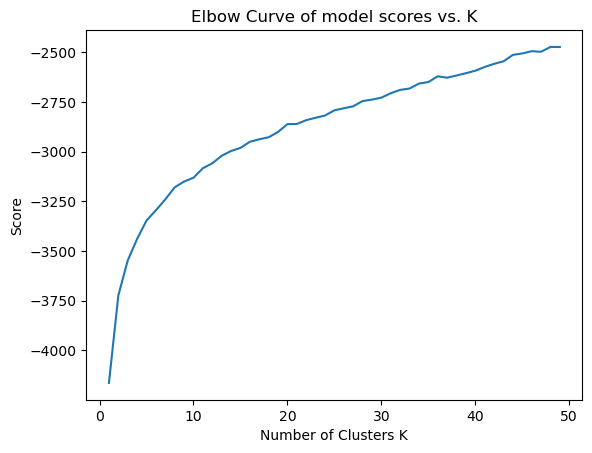

In [116]:
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters K')
plt.ylabel('Score')
plt.title('Elbow Curve of model scores vs. K')
plt.show()

C:\Users\athul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


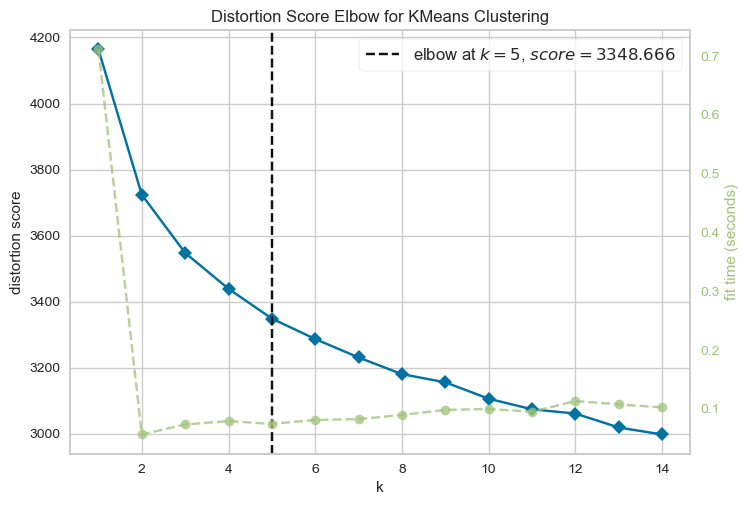

In [142]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 15))
visualizer.fit(df_1)
visualizer.show()
plt.show()

Looks like there is no solid elbow. However, the initial bend in the curve occurs around 5 clusters and slope seems to decrease around 15 clusters. Keeping this in mind lets consider 10-12 clusters

### PCA for dimensionality reduction
In order to visualize clusters, we need to reduce the dimensionality of the dataset. It is difficult to visualize cluisters with 105 features. This can be done by using PCA.

In [117]:
from sklearn.decomposition import PCA

# Sticking with 2 principal components for ease of plotting the clusters
pca = PCA(n_components=2)
pca.fit(df_1)

X_reduced = pca.transform(df_1)
df_reduced = pd.DataFrame(X_reduced, index=df_1.index, columns=["PC1", "PC2"])

kmeans_10 = KMeans(init='random',
               n_clusters=2,
               n_init=10)

kmeans_10.fit(df_1)

clusters_10 = kmeans_10.predict(df_1)

df_reduced['cluster'] = clusters_10
reduced_centers = pca.transform(kmeans_10.cluster_centers_)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [114]:
def display_clusters(X_reduced, clusters, reduced_centers):
    for value in np.unique(clusters):
        selected = np.where(clusters == value)
        plt.scatter(X_reduced[selected, 0], X_reduced[selected, 1], alpha=0.8, label=value)
    plt.legend()
    boundary = np.max(np.abs(X_reduced[:, [0,1]])) * 1.1
    plt.xlim([-boundary,boundary])
    plt.ylim([-boundary,boundary])
    plt.plot([-100, 100], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-100, 100], color='grey', ls='--')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title("Projection of points (on PC1 and PC2) with {} clusters".format(len(reduced_centers)))

    plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1],
                marker='x', s=169, linewidths=3,
                color='black', zorder=10)

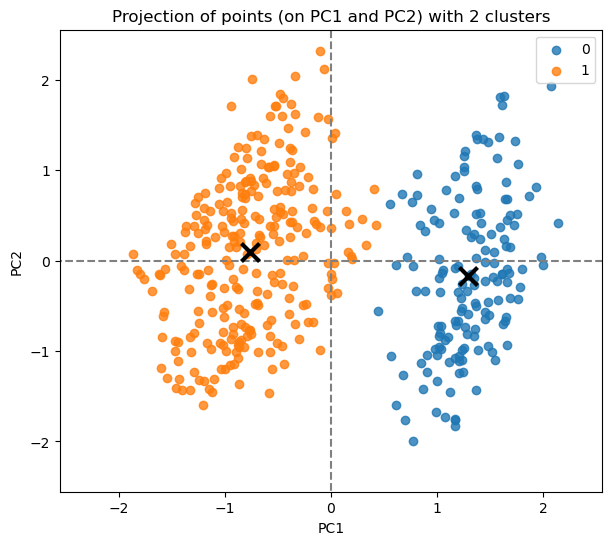

In [118]:
fig = plt.figure(figsize=(7,6))
display_clusters(X_reduced, clusters_10, reduced_centers)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  w

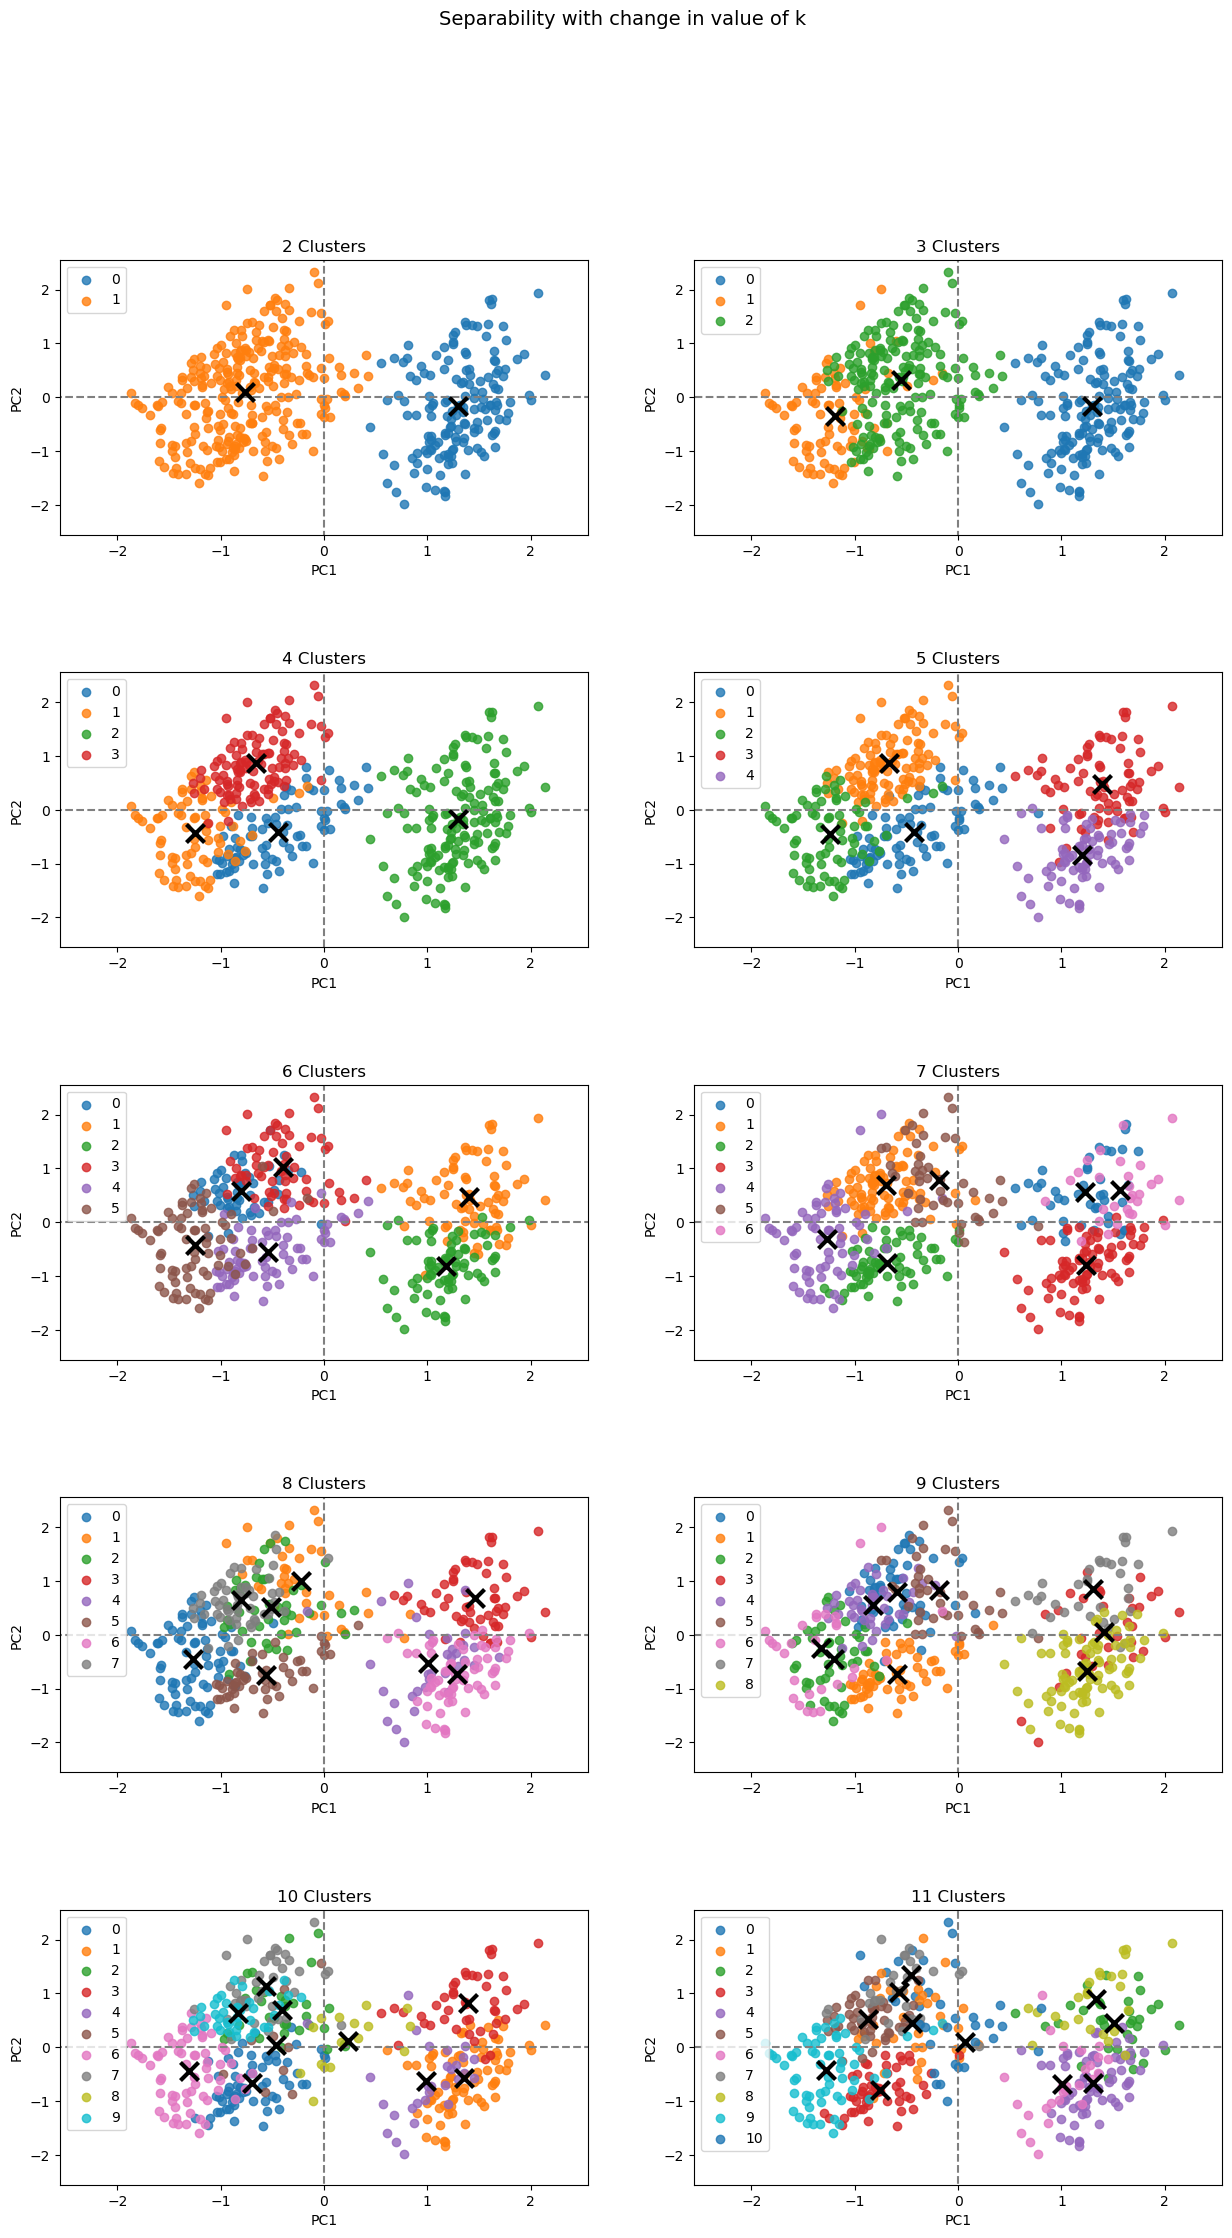

In [120]:
plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Separability with change in value of k", fontsize=14)

# loop through the length of tickers and keep track of index
for n, cluster in enumerate(range(2,12,1)):
    # add a new subplot iteratively
    ax = plt.subplot(5, 2, n + 1)
    
    kmeans = KMeans(init='random',
               n_clusters=cluster,
               n_init=10)

    kmeans.fit(df_1)

    clusters = kmeans.predict(df_1)
    reduced_centers = pca.transform(kmeans.cluster_centers_)
    
    display_clusters(X_reduced, clusters, reduced_centers)
    ax.set_title("{} Clusters".format(len(reduced_centers)))            


From the figure it looks like k=5 clusters give best results. Let's keep k=5 here on forth.

In [131]:
kmeans = KMeans(init='random',
                n_clusters=2,
                n_init=10)

kmeans.fit(df_1)

clusters = kmeans.predict(df_1)
reduced_centers = pca.transform(kmeans.cluster_centers_)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


### Analysis of K means
Lets look at how each cluster differs with respect to the features in the dataset.

In [143]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_1.columns)
centroids['cluster'] = centroids.index
centroids

weekly_home_support_hours  weekly_attendant_care_hours  weekly_acute_hours  \
0                   0.001739                          0.0                 0.0   
1                   0.016008                          0.0                 0.0   
2                   0.009687                          0.0                 0.0   
3                   0.057823                          0.0                 0.0   
4                   0.000000                          0.0                 0.0   

   wci_not_eligible  wci_eligible_client  wci_control_client  \
0               0.0             1.000000       -1.110223e-16   
1               0.0             0.082569        1.000000e+00   
2               0.0             0.126582        1.000000e+00   
3               0.0             1.000000        3.030303e-02   
4               0.0             0.025974        1.000000e+00   

   wci_consent_given  wci_client_status  unique_caregivers  \
0       5.551115e-17       1.000000e+00           0.195856   
1       2.247706e-01       0.000000e+00           0.185105   
2       2.468354e-01       3.330669e-16           0.179449   
3       1.515152e-02       9.696970e-01           0.300357   
4       1.363636e-01       2.775558e-16           0.190985   

   total_weekly_hours  ...  Care Plan/Schedule Update  \
0            0.198400  ...                   0.556818   
1            0.264744  ...                   0.899083   
2            0.177861  ...                   0.632911   
3            0.359926  ...                   0.666667   
4            0.220514  ...                   0.948052   

   Client Issue/Incident/Complaint  CoVID 19  Health Decline  \
0                         0.215909  0.465909        0.329545   
1                         0.440367  0.550459        0.247706   
2                         0.227848  0.518987        0.139241   
3                         0.500000  0.484848        0.500000   
4                         0.064935  0.077922        0.103896   

   Health Status Check  Hospitalization  Injury/Fall  LOC Change     Other  \
0             0.329545         0.318182     0.136364    0.159091  0.295455   
1             0.458716         0.256881     0.247706    0.036697  0.458716   
2             0.303797         0.240506     0.177215    0.139241  0.367089   
3             0.560606         0.484848     0.590909    0.136364  0.666667   
4             0.090909         0.233766     0.090909    0.025974  0.181818   

   cluster  
0        0  
1        1  
2        2  
3        3  
4        4  

[5 rows x 106 columns]

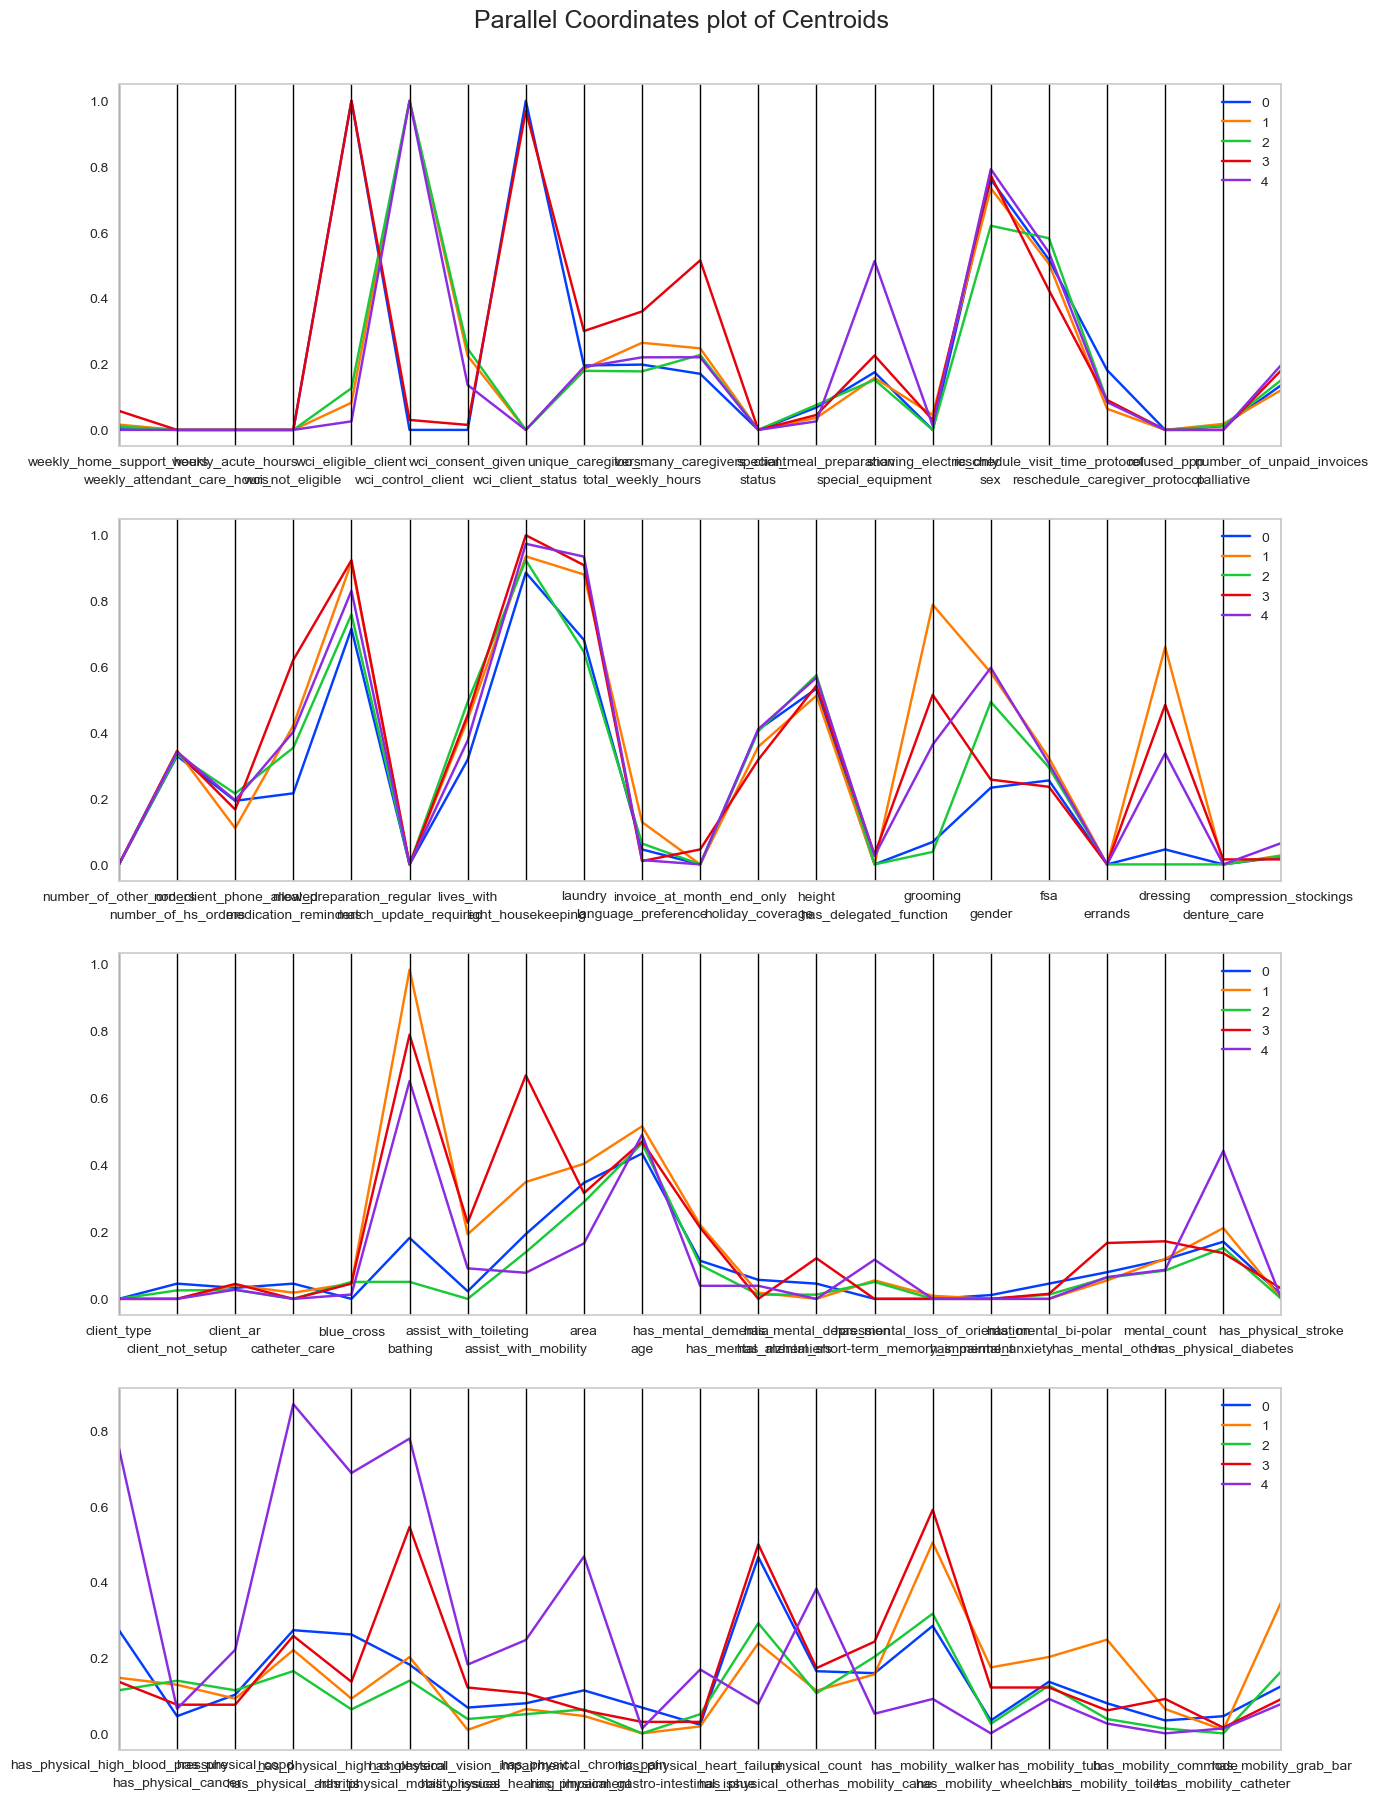

In [155]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(15, 25))
fig.suptitle("Parallel Coordinates plot of Centroids", fontsize=18)
fig.subplots_adjust(top=0.95, wspace=0)
plt.xlabel = "Features"
plt.ylabel = "Value of Centroid"

for i in range(1,5,1):
    # add a new subplot iteratively
    ax = plt.subplot(5, 1, i)

    centroids_1 = centroids.iloc[:,(i-1)*21:i*21]
    centroids_1['cluster'] = centroids.cluster
    parallel_coordinates(centroids_1, 'cluster', color=sns.color_palette("bright", 10))

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

It looks like when k=2, the clusters emerge based on if observations are wci_control_client or not.

In [156]:
kmeans = KMeans(init='random',
                n_clusters=2,
                n_init=10)

kmeans.fit(df_1)

clusters = kmeans.predict(df_1)
reduced_centers = pca.transform(kmeans.cluster_centers_)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [157]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_1.columns)
centroids['cluster'] = centroids.index

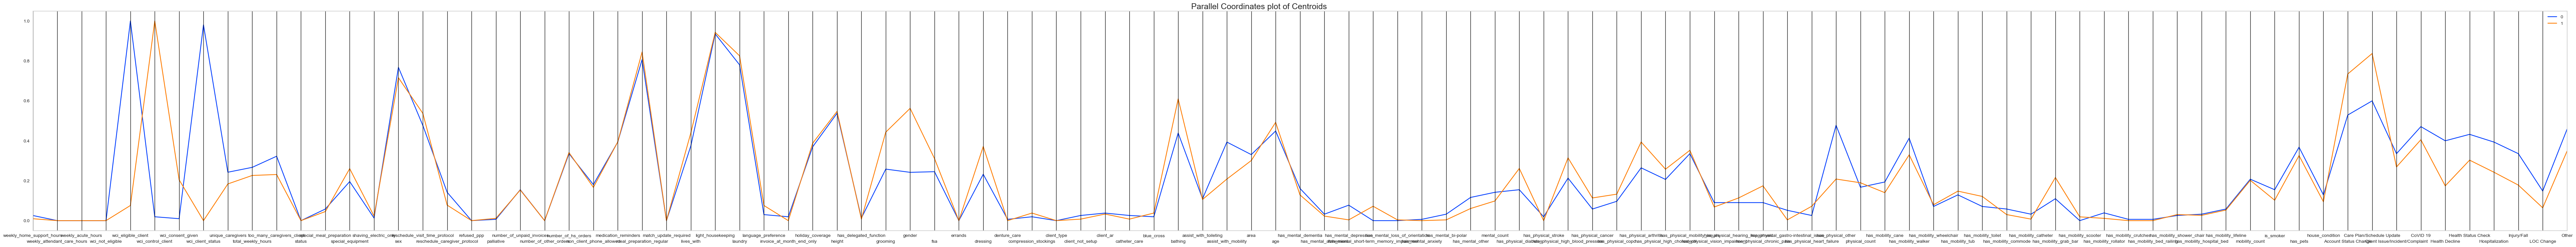

In [159]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(100, 8))
title = fig.suptitle("Parallel Coordinates plot of Centroids", fontsize=18)
fig.subplots_adjust(top=0.95, wspace=0)
plt.xlabel = "Features"
plt.ylabel = "Value of Centroid"

parallel_coordinates(centroids, 'cluster', color=sns.color_palette("bright", 10))

# Stagger the axes
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20)    

## Observations pertaining to notable events.

It is evident that clusters 0,1,3 behave relatively similarly when it comes to notable events like Covid19,Health Decline, Hospitalization, Fall as compared to clusters 2, 4.

However, more separability is observed in the pca transformed space. Need further analysis

C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\athul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  w

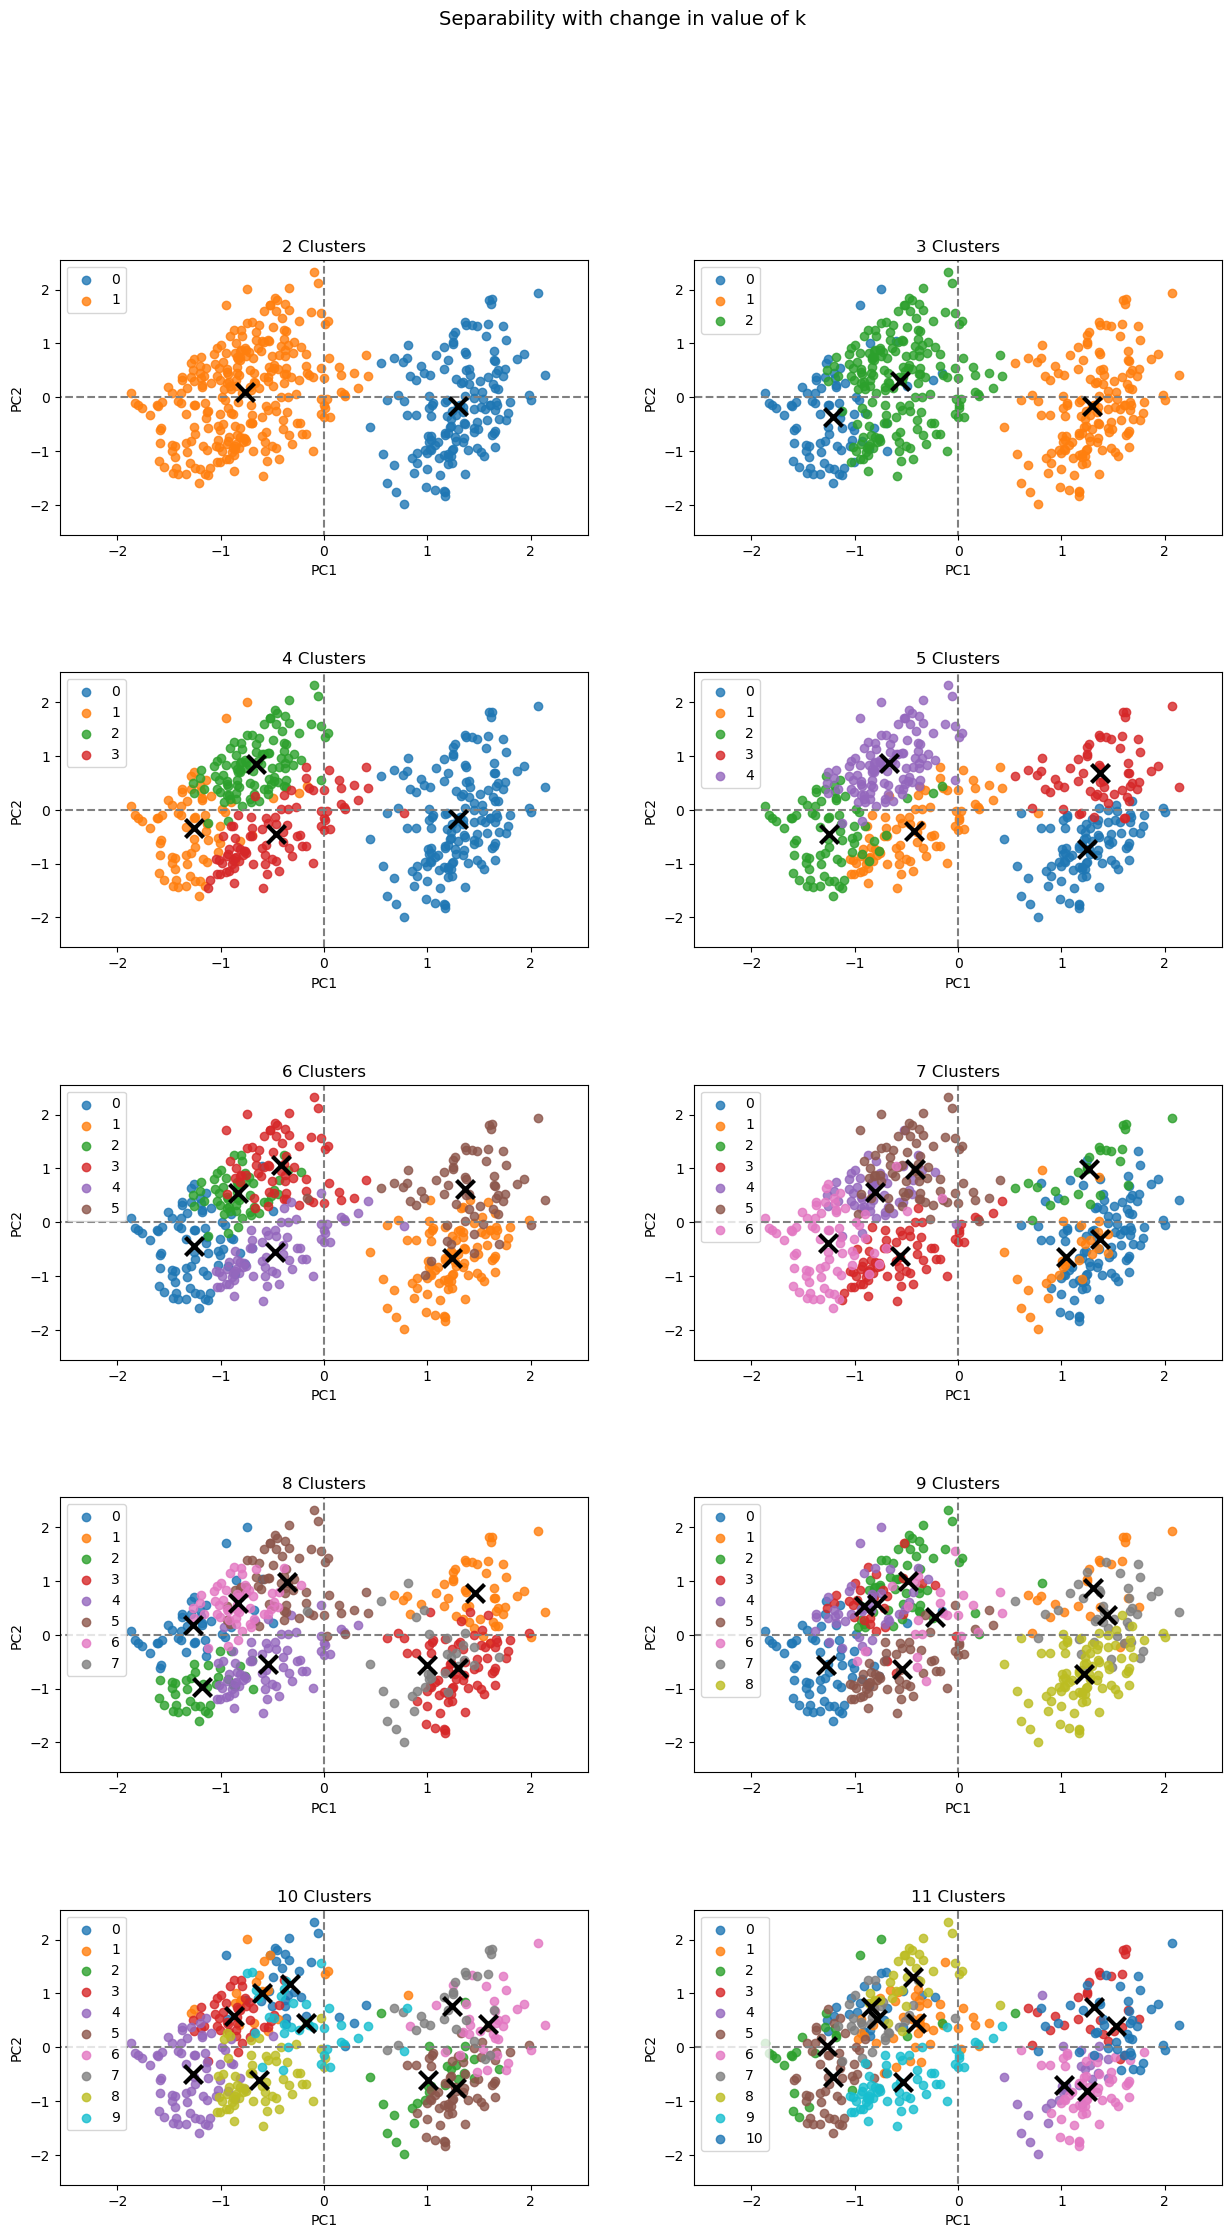

In [128]:
plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Separability with change in value of k", fontsize=14)

# loop through the length of tickers and keep track of index
for n, cluster in enumerate(range(2,12,1)):
    # add a new subplot iteratively
    ax = plt.subplot(5, 2, n + 1)
    
    kmeans = KMeans(init='random',
               n_clusters=cluster,
               n_init=10,
                algorithm='elkan')

    kmeans.fit(df_1)

    clusters = kmeans.predict(df_1)
    reduced_centers = pca.transform(kmeans.cluster_centers_)
    
    display_clusters(X_reduced, clusters, reduced_centers)
    ax.set_title("{} Clusters".format(len(reduced_centers)))            